In [2]:
import sacpy as scp
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst = xr.where(np.abs(sst)>100,np.NAN,sst)

ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()
sstas = ssta.loc[:,-30:30,120:280]


In [23]:
sstas

<xarray.DataArray 'sst' (time: 1828, lat: 30, lon: 81)>
array([[[        nan,         nan,         nan, ..., -0.49941826,
         -0.5819378 , -0.61192894],
        [        nan,         nan,         nan, ..., -0.56087303,
         -0.63754463, -0.63302803],
        [        nan,         nan,         nan, ..., -0.7797661 ,
         -0.8638191 , -0.7799282 ],
        ...,
        [ 0.6766548 ,  0.758646  ,  0.48568726, ..., -0.48910904,
         -0.30517387, -0.36384392],
        [        nan,  0.55141735,  0.6507931 , ..., -0.31978798,
                 nan,         nan],
        [        nan,  0.4124632 ,  0.6569729 , ..., -0.09022141,
                 nan, -0.339386  ]],

       [[        nan,         nan,         nan, ..., -0.9478626 ,
         -1.1033344 , -1.0045757 ],
        [        nan,         nan,         nan, ..., -0.94029045,
         -1.1041012 , -0.9955139 ],
        [        nan,         nan,         nan, ..., -0.87384415,
         -0.9847641 , -0.9301872 ],
...
        [ 2.1435127 ,  2.1291256 ,  1.5284443 , ...,  0.2923584 ,
          0.4779663 ,  0.9027176 ],
        [        nan,  2.403882  ,  2.1572723 , ...,  0.03219604,
                 nan,         nan],
        [        nan,  2.2870493 ,  2.1886082 , ...,  0.25533867,
                 nan,  1.1673107 ]],

       [[        nan,         nan,         nan, ..., -0.3166523 ,
         -0.4987545 , -0.8007717 ],
        [        nan,         nan,         nan, ..., -0.5761547 ,
         -0.7052307 , -1.0498428 ],
        [        nan,         nan,         nan, ..., -0.85746956,
         -0.93841743, -1.171566  ],
        ...,
        [ 1.7823238 ,  1.7928696 ,  1.5106907 , ...,  0.6925602 ,
          0.79382706,  0.7910137 ],
        [        nan,  2.229021  ,  2.1217232 , ...,  0.41571808,
                 nan,         nan],
        [        nan,  2.2829466 ,  2.3048525 , ...,  0.51684   ,
                 nan,  1.0954876 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 120.0 122.0 124.0 126.0 ... 274.0 276.0 278.0 280.0
  * lat      (lat) float64 -29.0 -27.0 -25.0 -23.0 -21.0 ... 23.0 25.0 27.0 29.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4

In [24]:
eof = scp.EOF(sstas)
eof.solve()

In [25]:
pc = eof.get_pc(npt=3)
pt = eof.get_pt(npt=3)

In [37]:
pc.shape,pt.shape

((3, 1828), (3, 30, 81))

In [27]:
var = eof.get_varperc()

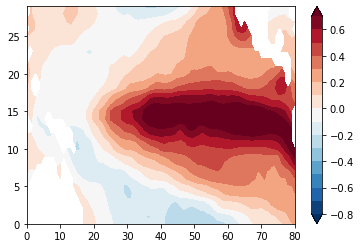

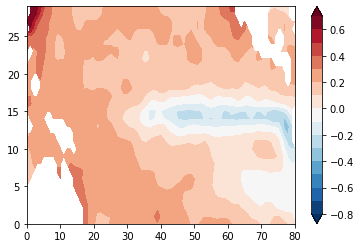

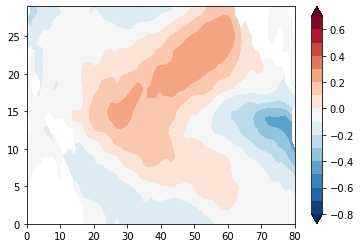

In [28]:
for i in range(3):
    plt.contourf(pt[i],cmap="RdBu_r",levels=np.arange(-0.8,0.8,0.1),extend="both")
    plt.colorbar()
    plt.show()

Text(0.5, 1.0, 'PC')

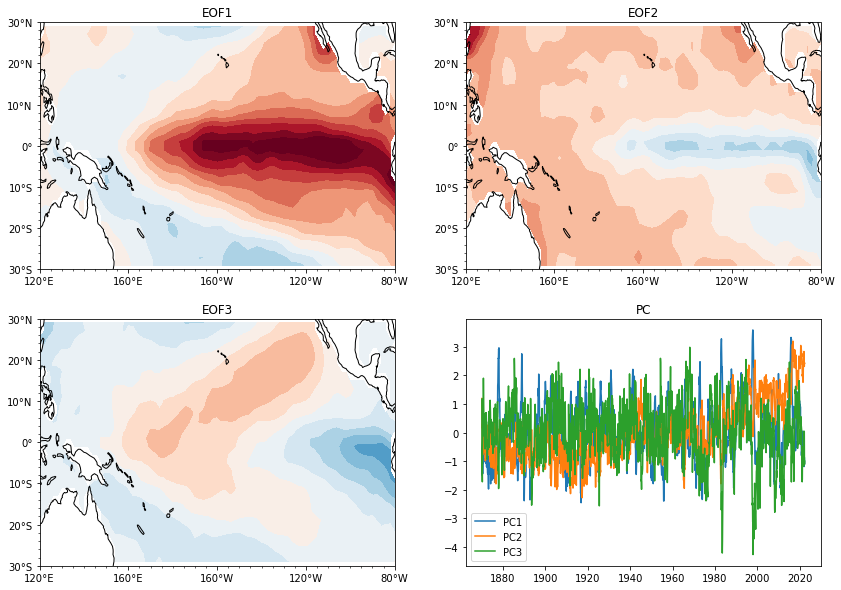

In [34]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
fig = plt.figure(figsize=[14,10])
x = sstas.lon
y = sstas.lat
for i in range(3):
    ax = fig.add_subplot(2,2,i+1,projection=ccrs.PlateCarree(central_longitude=180))
    ax.contourf(x,y,pt[i],cmap="RdBu_r",levels=np.arange(-0.8,0.81,0.1),extend="both",transform=ccrs.PlateCarree())
    ax.coastlines()
#     ax.coastlines()
    ax.set_aspect("auto") # 回复原大小
    xticks = np.arange(120,281,40)
    yticks = np.arange(-30,31,10)
    smallx = 5
    smally = 2

    # copy
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    ax.set_title(f"EOF{i+1}")
ax4 = fig.add_subplot(2,2,4)
for i in range(3):
    ax4.plot(sstas.time,pc[i],label=f"PC{i+1}")
ax4.legend()
ax4.set_title("PC")

对印度洋地区的海温anomaly做EOF分析，并画出前三个mode的PC和PT